# Linear Regression: Car Prices Prediction

A quite common task in the context of Machine Learning is the prediction of a variable based on some descriptors. In this case, we will start with a dataset that involves eight variables (some numeric, others categorical) and the price of a car, which is desired to be estimated using a linear regression model.

This notebook shows:
- Some ways to deal with non-numeric categorical descriptors.
- Use of the Pandas library to handle tabular data in .csv format.
- Use of the Scikit Learn library for preprocessing and training a linear regression model.
- Functioning and implementation of the Stochastic Gradient Descent algorithm for a basic linear model.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
# Explore the Toyota dataset.
df = pd.read_csv('carDataset/toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


There's some numeric categories, and others of type _object_ (string).

In [4]:
categ = ['model','year','transmission','fuelType','engineSize']
str_categ = ['model','transmission','fuelType']
numer = ['price','mileage','tax','mpg']

# Part 1

Below, the data was fitted to a linear regression model defined using the SciKit-Learn library. Two accuracy metrics are observed, in this case Mean Squared Error (RMSE) and $R^2$ (you can read more about this metric in [ScikitLearn: r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)).

#### Cases:

- Case 1: One-Hot Encoding (MinMaxScaler)
- Case 2: Ordinal Encoding (MinMaxScaler)
- Case 3: One-Hot Encoding (RobustScaler)
- Case 4: Ordinal Encoding (RobustScaler)
- Case 5: Train with 30% (Ordinal Encoding, MinMaxScaler)
- Case 6: Train with 55% (Ordinal Encoding, MinMaxScaler)
- Case 7: Train with 80% (Ordinal Encoding, MinMaxScaler)

Analyze the results.

### Case 1:

#### One-Hot Encoding

One way to encode non-numeric categories is known as _one-hot encoding_, where a column is created for each different value that exists in the feature we are encoding, and for each record, mark with a 1 the column to which that record belongs and leave the others with 0.

Similarly, in this case, data scaling will be performed using a `MinMaxScaler`, learn more about this function at: [ScikitLearn: MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [5]:
df_ohe = pd.get_dummies(df)
scaler = MinMaxScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
df_scl_ohe.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.818182,0.256150,0.138100,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.863636,0.256066,0.106716,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.772727,0.222301,0.157479,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.863636,0.306839,0.084476,0.265487,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.863636,0.281478,0.208019,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Data splitting

In [6]:
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()

model_1.fit(X_train, y_train)
preds = model_1.predict(X_test)
rmse1 = np.sqrt(mean_squared_error(y_test, preds))
rs1 = model_1.score(X_test, y_test)
print(f'RMSE: {round(rmse1,3)}')
print(f'R^2: {round(rs1,3)}\n')

RMSE: 4578968730.302
R^2: -1.7604401544543278e+21



### Case 2

#### Ordinal Encoding

In [8]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Data Splitting

In [9]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [10]:
model_2 = LinearRegression()

model_2.fit(X_train, y_train)
preds = model_2.predict(X_test)
rmse2 = np.sqrt(mean_squared_error(y_test, preds))
rs2 = model_2.score(X_test, y_test)
print(f'RMSE: {round(rmse2,3)}')
print(f'R^2: {round(rs2,3)}\n')

RMSE: 0.05
R^2: 0.787



### Case 3

#### One-Hot Encoding

In [11]:
df_ohe = pd.get_dummies(df)
scaler = RobustScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
df_scl_ohe.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.5,0.776286,0.257936,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.775541,0.004718,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,0.477703,0.414289,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.223415,-0.174718,0.103448,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.999702,0.822056,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Data Splitting

In [12]:
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [13]:
model_3 = LinearRegression()

model_3.fit(X_train, y_train)
preds = model_3.predict(X_test)
rmse3 = np.sqrt(mean_squared_error(y_test, preds))
rs3 = model_3.score(X_test, y_test)
print(f'RMSE: {round(rmse3,3)}')
print(f'R^2: {round(rs3,3)}\n')

RMSE: 72434050793.632
R^2: -5.661518740304903e+21



### Case 4

#### Ordinal Encoding

In [14]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = RobustScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.066667,-0.5,0.776286,0.0,0.257936,0.0,0.896552,-1.955882,0.625
1,0.066667,0.0,0.775541,0.0,0.004718,0.0,0.068966,-1.955882,0.625
2,0.066667,-1.0,0.477703,0.0,0.414289,0.0,0.896552,-1.955882,0.625
3,0.066667,0.0,1.223415,0.0,-0.174718,0.0,0.103448,-1.955882,0.625
4,0.066667,0.0,0.999702,0.0,0.822056,0.0,0.068966,-1.955882,0.625


#### Data splitting

In [15]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [16]:
model_4 = LinearRegression()

model_4.fit(X_train, y_train)
preds = model_4.predict(X_test)
rmse4 = np.sqrt(mean_squared_error(y_test, preds))
rs4 = model_4.score(X_test, y_test)
print(f'RMSE: {round(rmse4,3)}')
print(f'R^2: {round(rs4,3)}\n')

RMSE: 0.444
R^2: 0.787



### Case 5

#### Ordinal Encoding

In [17]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Data Splitting

In [18]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=22)

In [19]:
model_5 = LinearRegression()

model_5.fit(X_train, y_train)
preds = model_5.predict(X_test)
rmse5 = np.sqrt(mean_squared_error(y_test, preds))
rs5 = model_5.score(X_test, y_test)
print(f'RMSE: {round(rmse5,3)}')
print(f'R^2: {round(rs5,3)}\n')

RMSE: 0.049
R^2: 0.785



### Case 6

#### Ordinal Encoding

In [20]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Data Splitting

In [21]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=22)

In [22]:
model_6 = LinearRegression()

model_6.fit(X_train, y_train)
preds = model_6.predict(X_test)
rmse6 = np.sqrt(mean_squared_error(y_test, preds))
rs6 = model_6.score(X_test, y_test)
print(f'RMSE: {round(rmse6,3)}')
print(f'R^2: {round(rs6,3)}\n')

RMSE: 0.05
R^2: 0.784



### Case 7

#### Ordinal Encoding

In [23]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Data Splitting

In [24]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [25]:
model_7 = LinearRegression()

model_7.fit(X_train, y_train)
preds = model_7.predict(X_test)
rmse7 = np.sqrt(mean_squared_error(y_test, preds))
rs7 = model_7.score(X_test, y_test)
print(f'RMSE: {round(rmse7,3)}')
print(f'R^2: {round(rs7,3)}\n')

RMSE: 0.05
R^2: 0.787



## Result Summary

In [32]:
# Define the dictionary containing the summarized information of the results for each case.
data = {'Case': ['1', '2', '3', '4', '5', '6', '7'],
        'Encoding': ['One-Hot', 'Ordinal', 'One-Hot', 'Ordinal', 'Ordinal', 'Ordinal', 'Ordinal'],
        'Scaler': ['Min-Max', 'Min-Max', 'Robust', 'Robust', 'Min-Max', 'Min-Max', 'Min-Max'],
        'RMSE': [np.round(rmse1, 3), np.round(rmse2, 3), np.round(rmse3, 3), np.round(rmse4, 3), np.round(rmse5, 3), np.round(rmse6, 3), np.round(rmse7, 3)],
        'R^2': [np.round(rs1, 3), np.round(rs2, 3), np.round(rs3, 3), np.round(rs4, 3), np.round(rs5, 3), np.round(rs6, 3), np.round(rs7, 3)]}
 
# Convert the result to a DataFrame.
table = pd.DataFrame(data).reset_index(drop=True)
table


,Case,Encoding,Scaler,RMSE,R^2
0,1,One-Hot,Min-Max,4.578969e+09,-1.760440e+21
1,2,Ordinal,Min-Max,5.000000e-02,7.870000e-01
2,3,One-Hot,Robust,7.243405e+10,-5.661519e+21
3,4,Ordinal,Robust,4.440000e-01,7.870000e-01
4,5,Ordinal,Min-Max,4.900000e-02,7.850000e-01
5,6,Ordinal,Min-Max,5.000000e-02,7.840000e-01
6,7,Ordinal,Min-Max,5.000000e-02,7.870000e-01


## Notes:

An $R^2$ closer to 1 indicates that the prediction model fits the data perfectly, while a value close to 0 indicates that there is no relationship between the predicted model and the data.

A Root Mean Squared Error (RMSE) closer to 0 indicates a better fit of the model to the data. The larger it is, the less relationship there will be between the data and the prediction model.


## Analysis:

From cases 1 and 2, it can be said that One-Hot Encoding had better results because the categories being encoded are not related by any specific order. For this type of data, using ordinal encoding carries the risk that the linear regression model assumes there is an ordinal relationship (taking into account the order) of the data. Since in this case our categories are not ordinally related, the model does not fit very well using this encoding method.

From cases 3 and 4, it can be noted that there is still a better result in terms of $R^2$ for One-Hot Encoding for the same reason discussed previously, although it can be noted that for both cases, the Root Mean Squared Error (RMSE) increased considerably. This may be due to the fact that the Robust Scaler is more accurate when scaling the data and takes into account outliers more, or data that is far from the mean. This indicates that in the case of our dataset, there may be many outliers causing the RMSE to increase. However, it is not a very high error. The fact that the RMSE is higher for ordinal encoding supports the fact that One-Hot encoding is more effective for our dataset, in which the categories do not have a specific order among them.

From cases 5, 6, and 7, it can be said that the Root Mean Squared Error and $R^2$ remained constant due to the fact that the same method was used to scale the data and also the same encoding method. A very minimal difference in the value of $R^2$ can be noticed for the three cases, although all are in the same range close to 0.7. Although this difference is minimal, the trend can be noticed that training the model with a higher percentage of the data returns a higher $R^2$. However, the difference is not very high, and the fact that the Root Mean Squared Error remains constant supports the idea that the amount of data used to train the model does not substantially affect the coefficient of determination of the linear model.


# Part 2

Now we develop our own implementation of the Stochastic Gradient Descent method. For this occasion, we use a One-Hot encoding, a RobustScaler, and we train using 80% of the data. At the end of the training, the `errors` list contains the error function values for each iteration so that progress can be observed graphically.

In [27]:
df_ohe = pd.get_dummies(df)
scaler = RobustScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)

X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [28]:
X_train_array = np.c_[np.ones(X_train.values.shape[0]), X_train.values]
y_train_array = y_train.values
X_test_array = np.c_[np.ones(X_test.values.shape[0]), X_test.values]
y_test_array = y_test.values

## Algorithm Implementation, Model Evaluation, and Results Graphs
#### (for different values of the learning rate $\eta_k$)


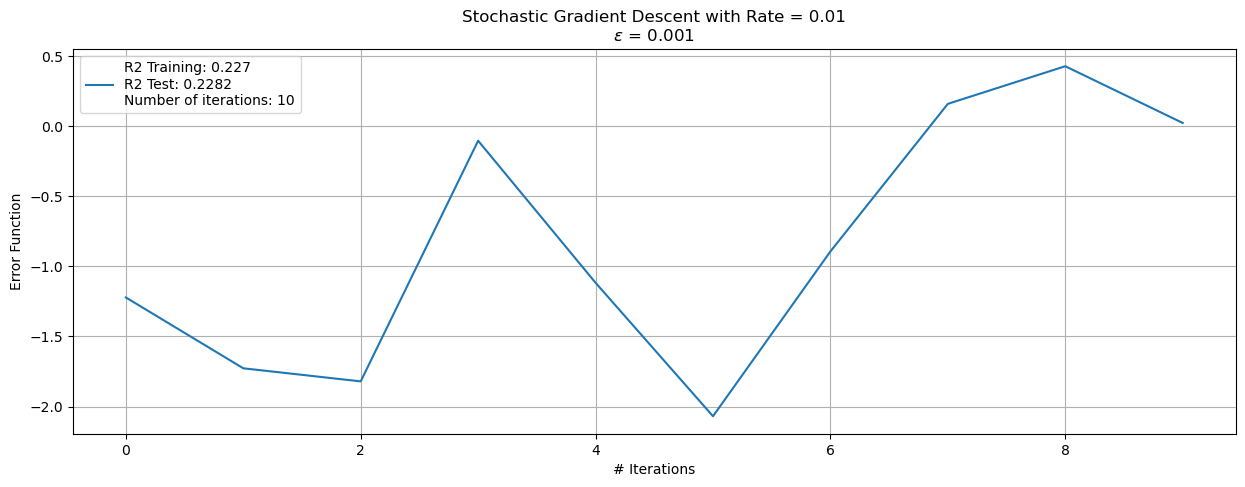

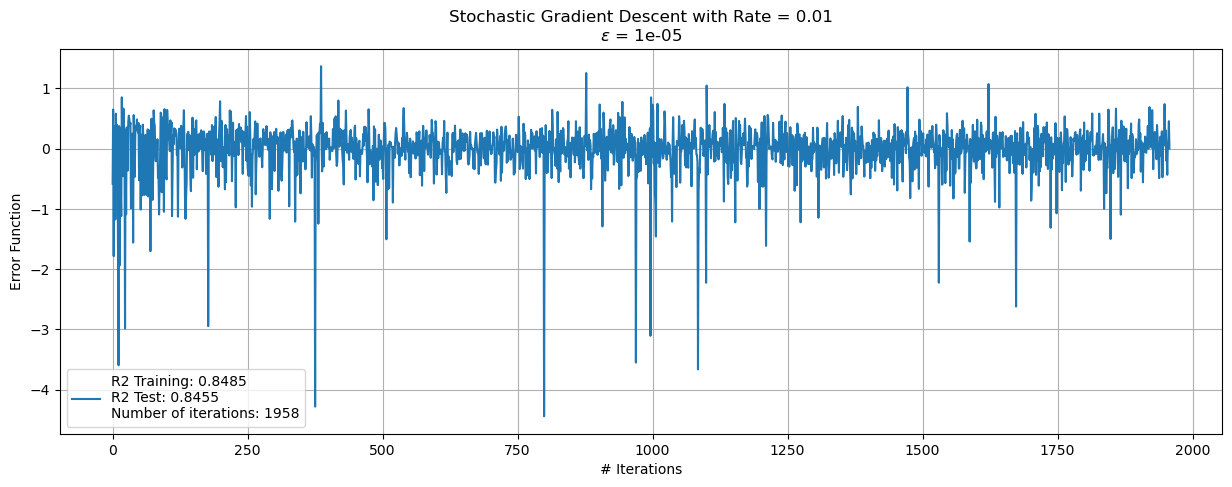

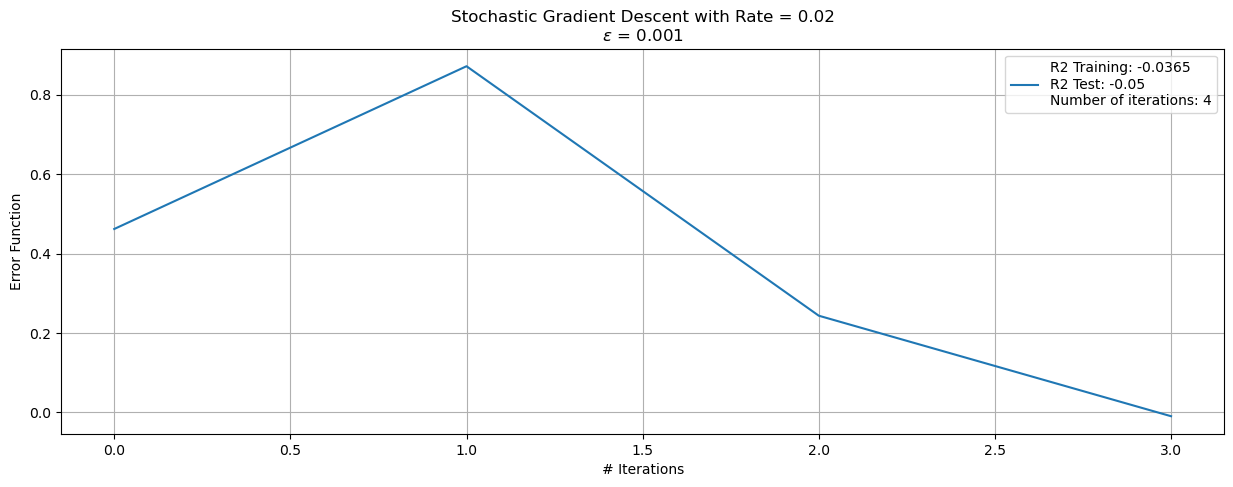

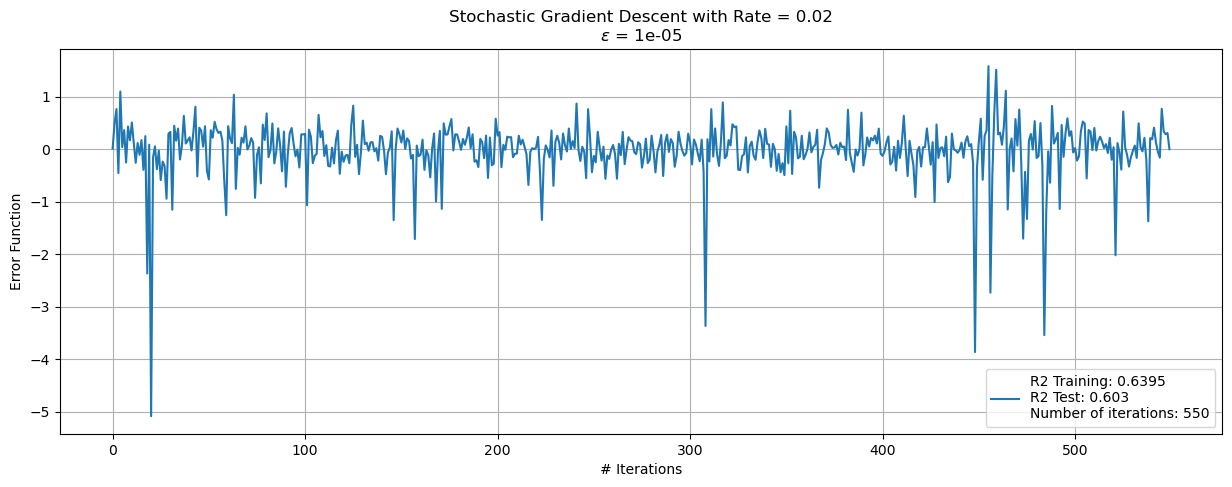

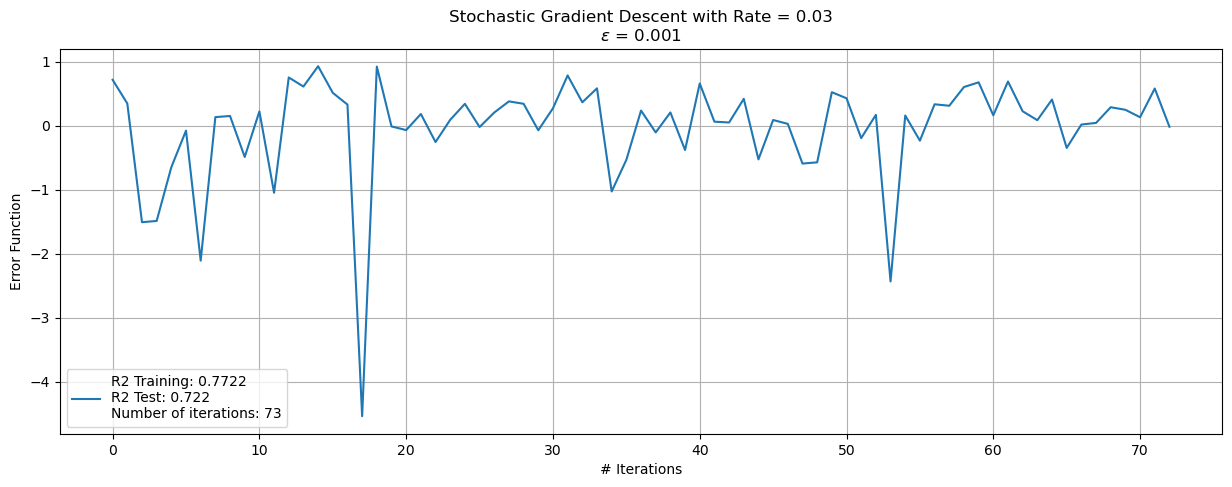

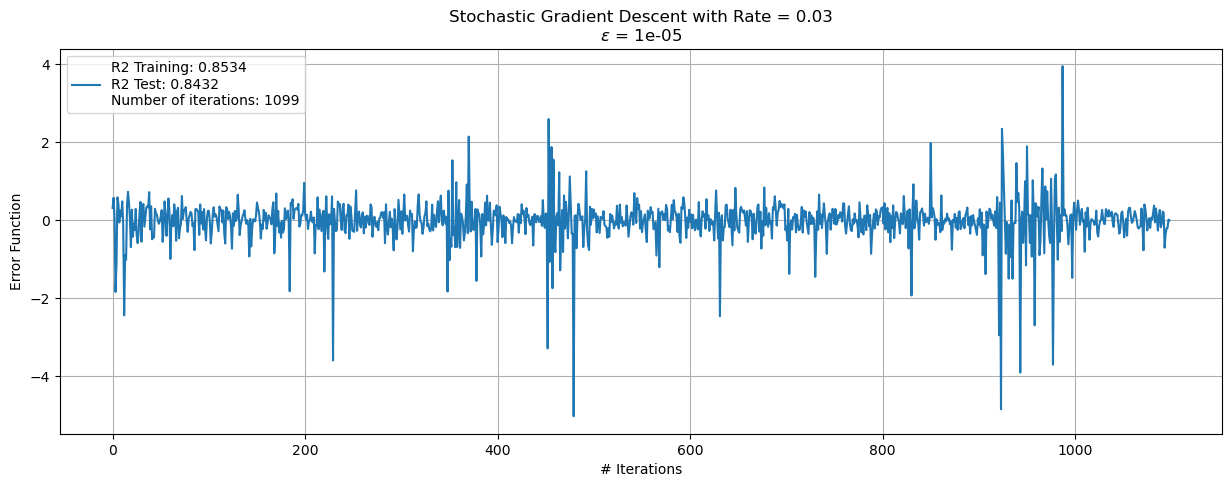

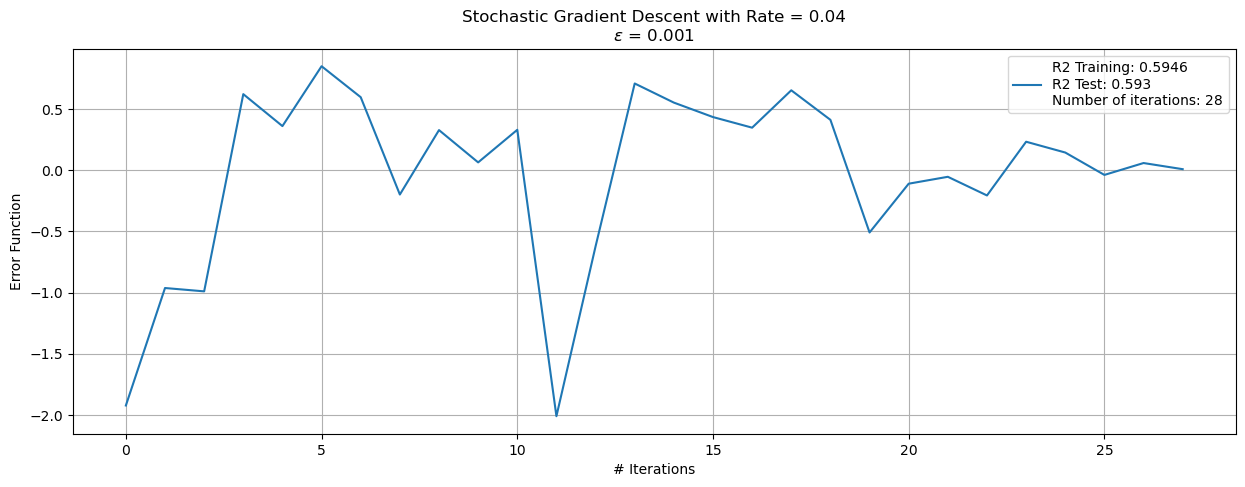

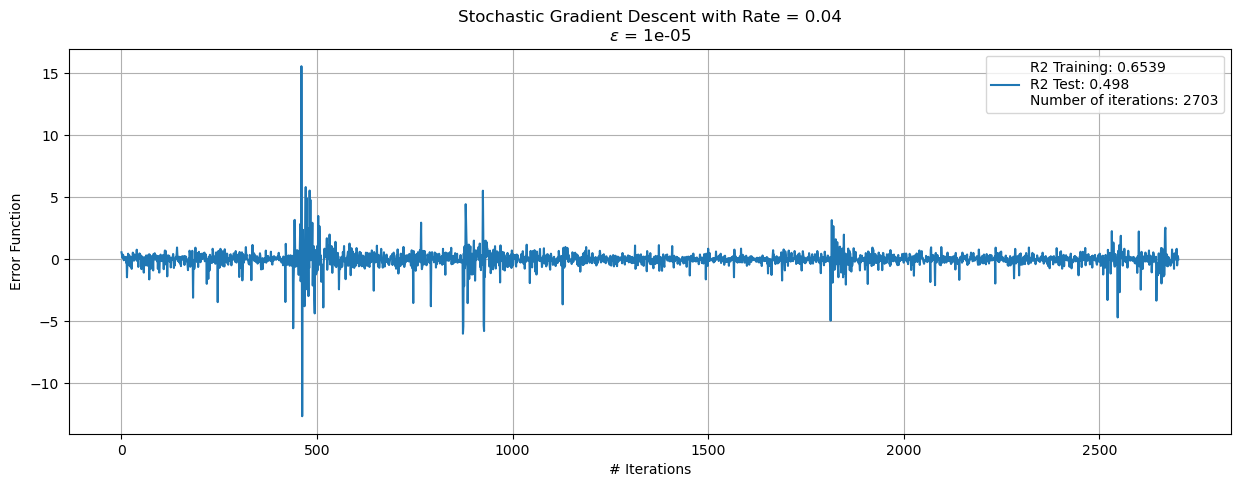

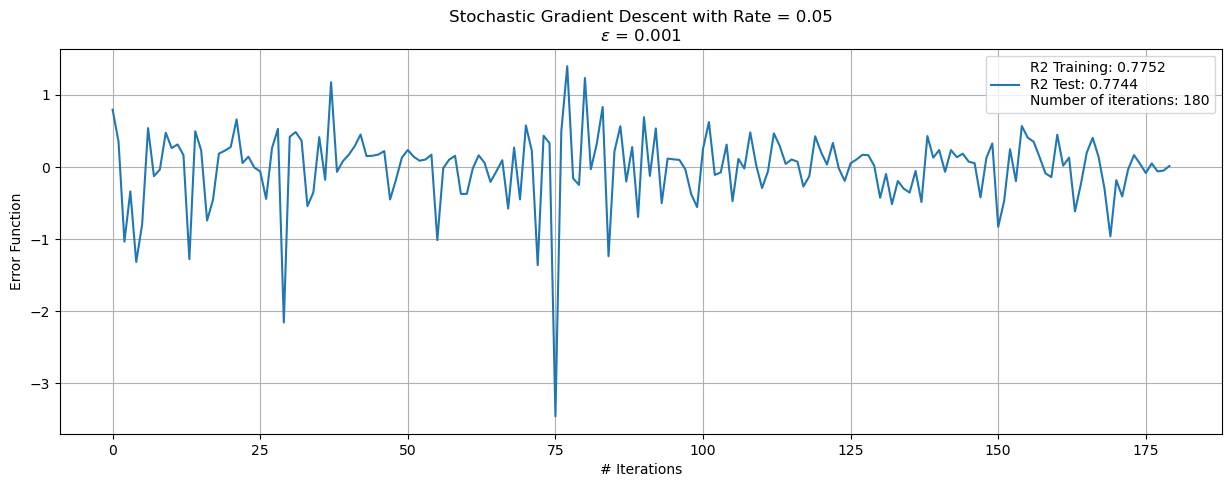

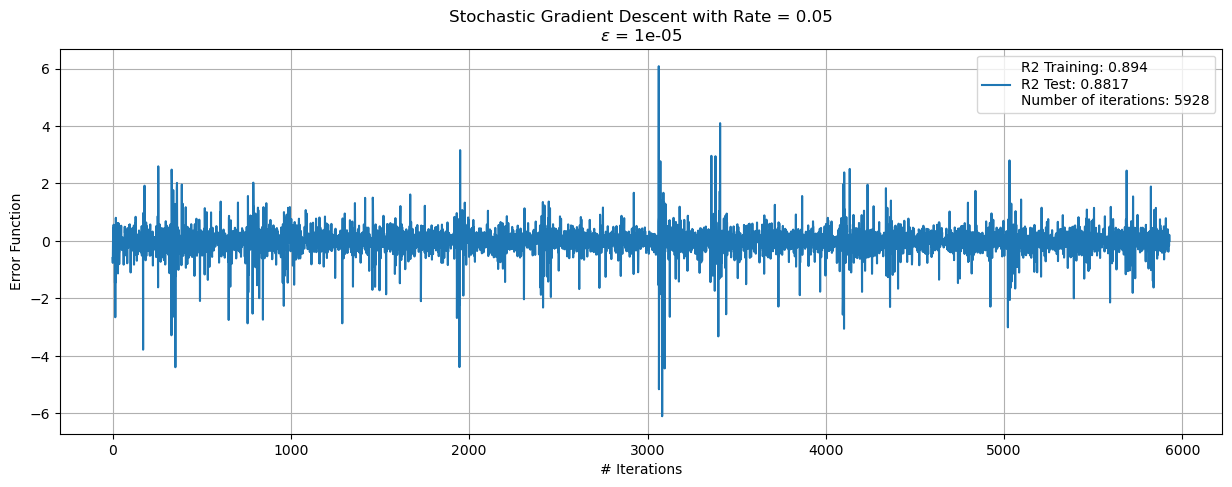

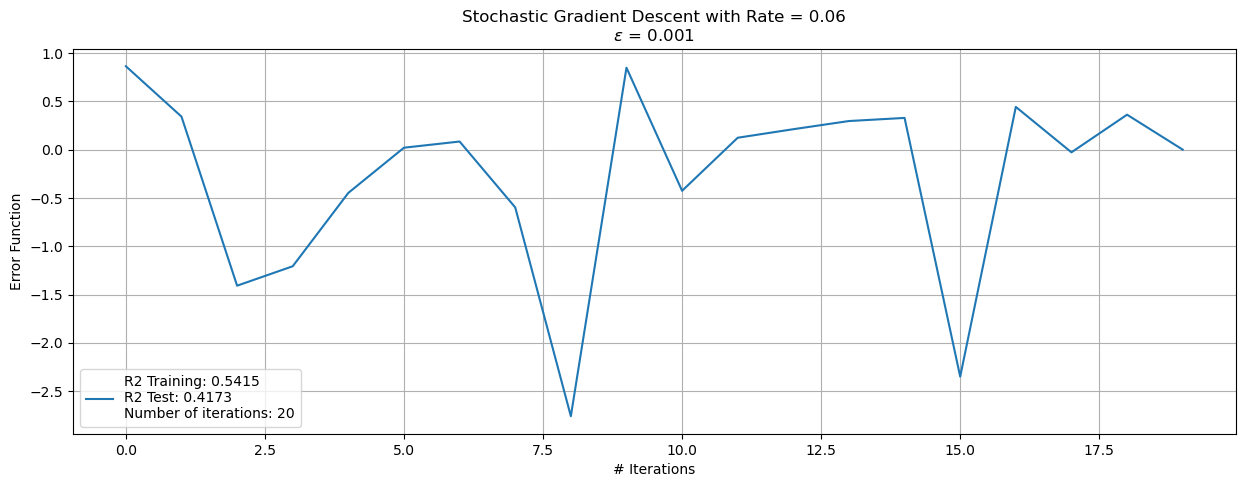

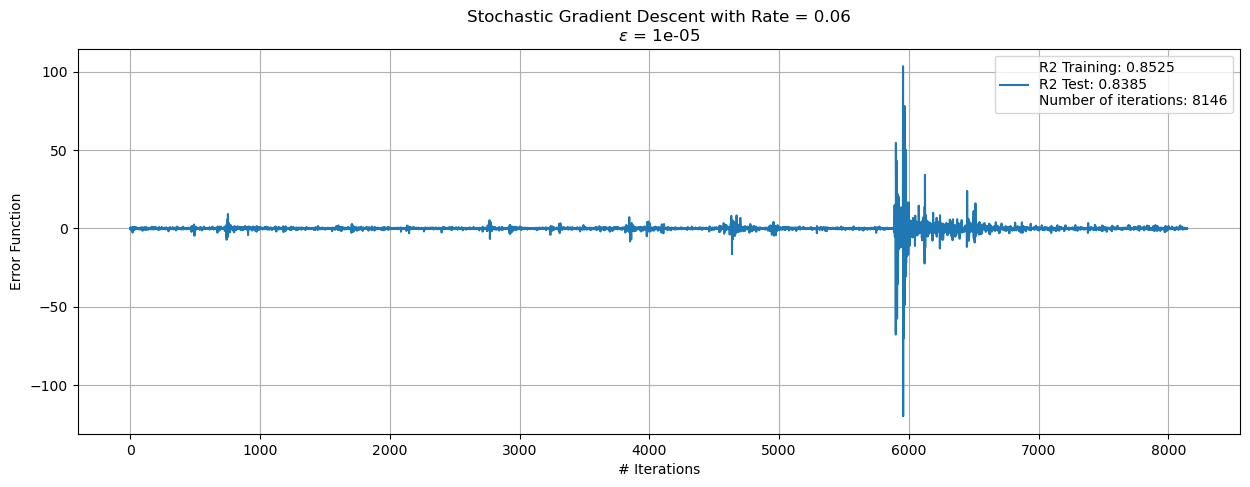

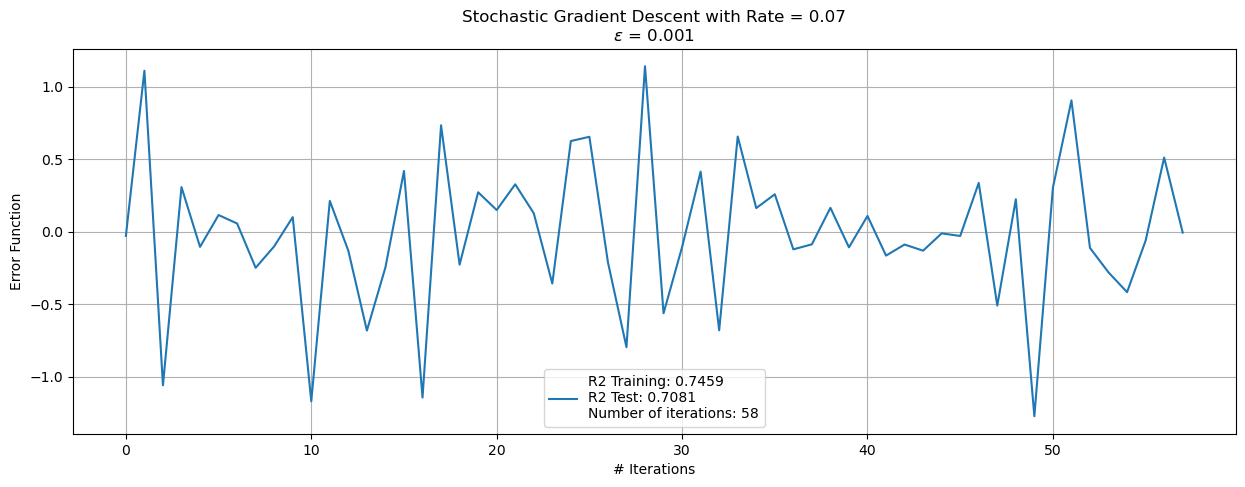

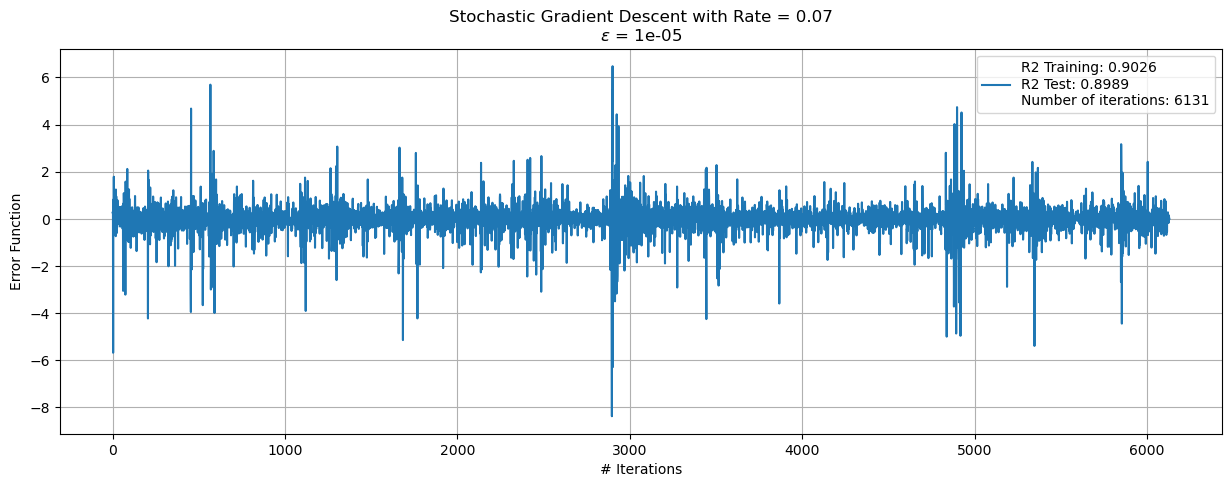

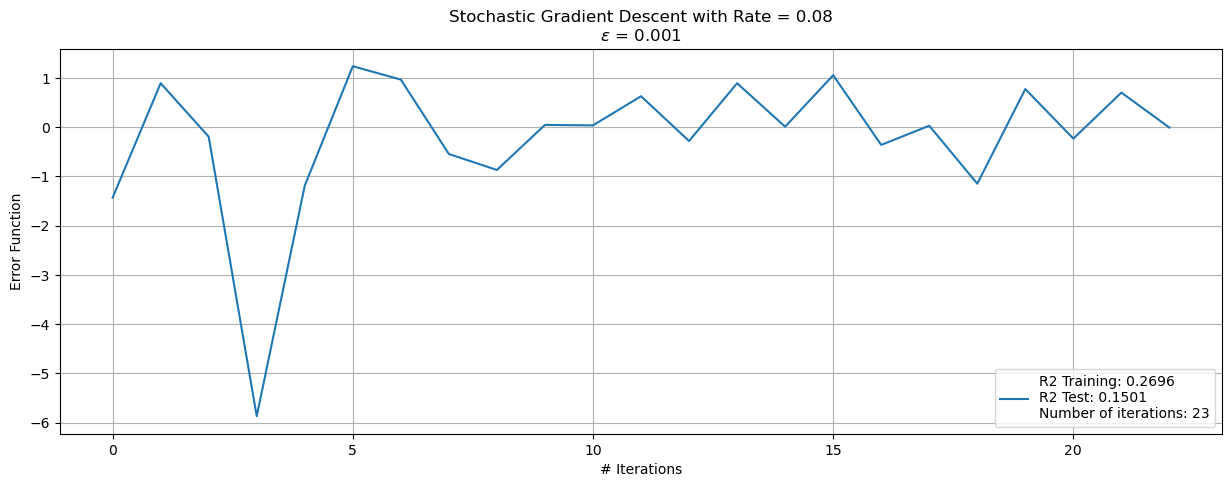

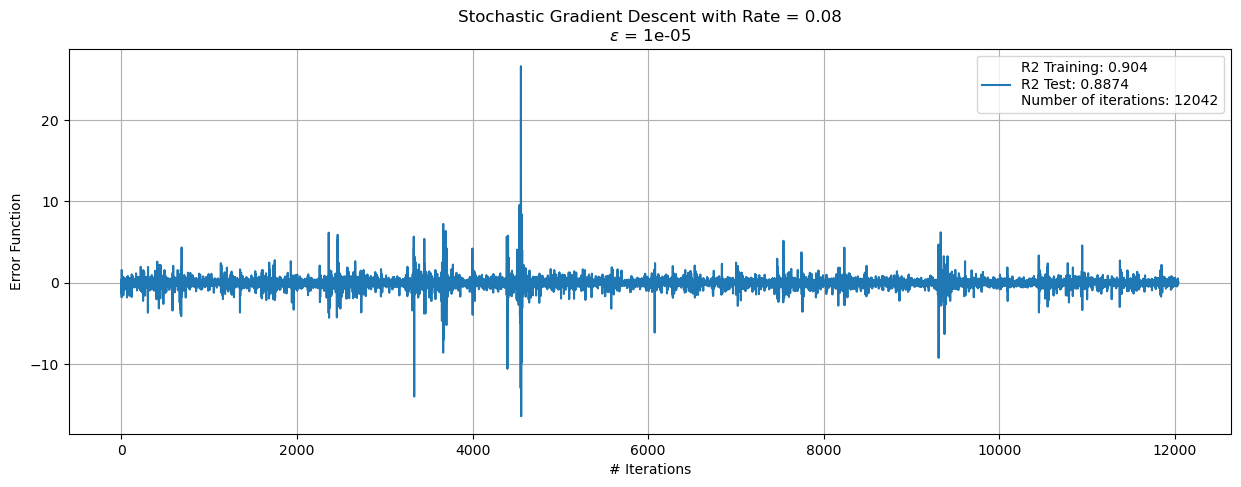

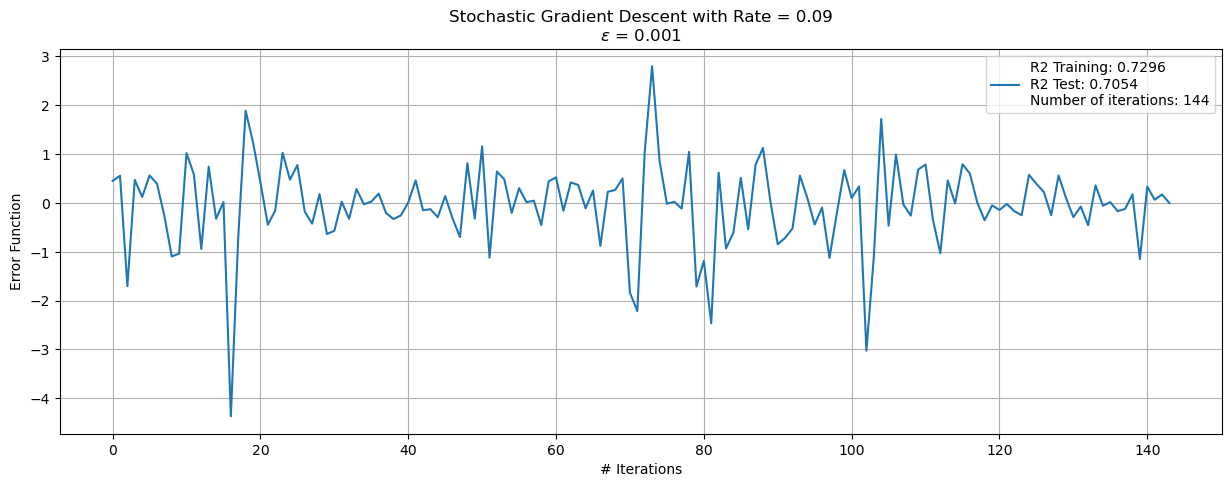

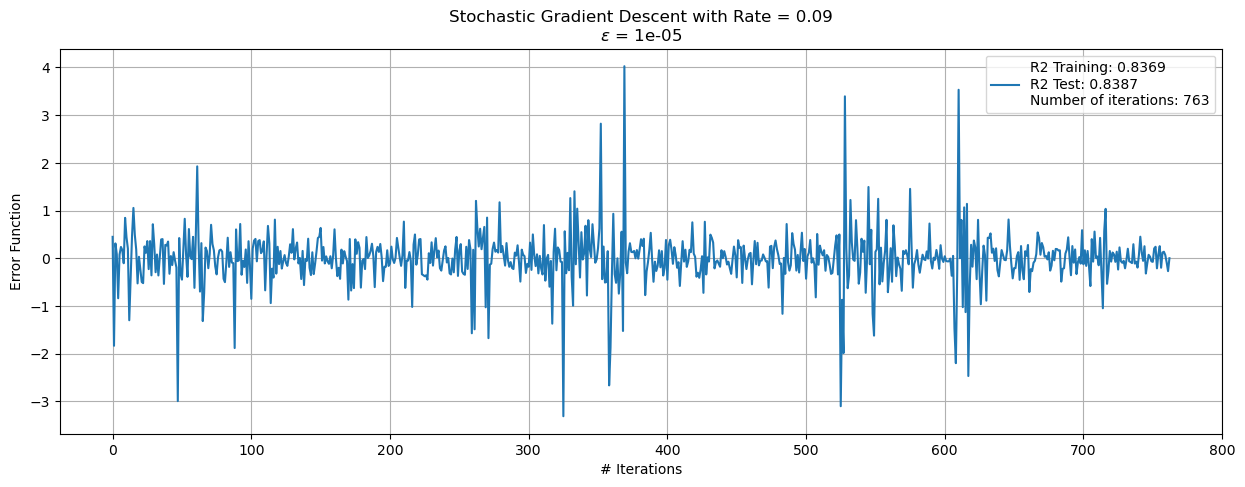

In [33]:
X_train_array = np.c_[np.ones(X_train.values.shape[0]), X_train.values]
y_train_array = y_train.values
X_test_array = np.c_[np.ones(X_test.values.shape[0]), X_test.values]
y_test_array = y_test.values

# Initialization of learning rate value

# Create a list of learning rates, for comparison of results for different learning rate values.
# Create a list of epsilons, for comparison of results for different algorithm tolerance values.
learning_rates = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
epsilons = [1e-3, 1e-5]

# List to monitor learning
errors = [] # Add to this list the error function values at each iteration #

for learning_rate in learning_rates:
    for eps in epsilons:

        # Initialization of w
        w0 = np.zeros((len(X_train_array[0]), 1)) # Random initialization #
        w = w0.copy()

        # Initialization of stopping criterion
        error = float('inf') # Initial value, must be updated in each iteration #
        diff = float('inf') # Difference between consecutive weight vectors w #

        # Iterative loop according to gradient descent algorithm
        while diff > eps:
            # Algorithm development #

            # Random pair selection
            i = np.random.randint(low=0, high=y_train_array.shape[0]) # Random position #
            current_x = np.matrix(np.array(X_train_array[i])).T
            current_y = np.matrix(np.array(y_train_array[i])).T
            
            # Calculate gradient and error
            grad = np.matmul(w.T, current_x)
            e = grad - current_y
            
            # Calculate parameter vector for current iteration
            new_w = w - learning_rate * float(e) * current_x
            
            # Calculation of difference between current iteration w and previous one
            diff = np.linalg.norm(w - new_w)
            
            # Add error to errors list
            errors.append(float(e))

            # Update parameter values
            w = new_w
            
            # # # # # # # # # # # # # #

        # Model evaluation
        y_train_preds = np.zeros(y_train_array.shape)

        for i in range(X_train_array.shape[0]):
            y_train_preds[i] = np.dot(w.T, X_train_array[i])

        y_test_preds = np.zeros(y_test_array.shape)
        for i in range(X_test_array.shape[0]):
            y_test_preds[i] = np.dot(w.T, X_test_array[i])
            
        r2_train = r2_score(y_train_array, y_train_preds)
        r2_test = r2_score(y_test_array, y_test_preds)

        # Results Plots
        plt.figure(figsize=(15,5))
        plt.plot(errors)
        plt.xlabel('# Iterations')
        plt.ylabel('Error Function')
        plt.title(f'Stochastic Gradient Descent with Rate = {learning_rate}\n' + r'$\epsilon$ = ' + f'{eps}')
        plt.legend([f'R2 Training: {round(r2_train,4)}\nR2 Test: {round(r2_test,4)}\nNumber of iterations: {len(errors)}'])
        plt.grid()

        errors = [] # Empty the list for plotting with the next rate and epsilon.


- Since we are working with stochastic gradient descent, the error function will not gradually approach zero, as the values are taken randomly and are not directly related to the error of the previous iteration.

- The choice of initial condition `current_x`, `current_y` in each iteration directly influences the convergence of the algorithm, as it will search for a solution closer depending on the starting point.

- In general, it can be noted that having a smaller $\epsilon$ value generates a larger number of iterations, as it requires the error to be even smaller to reach the termination condition. Similarly, a smaller $\epsilon$ generates much higher values of $R^2$ compared to a value two orders of magnitude smaller. Taking the above into account, it can be said that the disadvantage of using a larger tolerance value is obtaining a lower $R^2$ value, although there is rapid convergence. On the contrary, for a smaller tolerance value, the advantage is that much higher $R^2$ values are obtained, with the disadvantage that convergence is slower (requires more iterations).

- It can be noted that a learning rate around a value of 0.05 yields $R^2$ results closer to 1 compared to the other tested parameters, for both $\epsilon$ of $10^{-3}$ and $10^{-5}$. For this reason, a value of $\eta_k = 0.05$ and a value of $\epsilon = 10^{-3}$ (although choosing $\epsilon = 10^{-5}$ also yields good results with the aforementioned disadvantage) are selected as the optimal parameters for the linear regression model using stochastic gradient descent method, One-Hot encoding, RobustScaler, and training with 80% of the data.